In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Customers (1).csv')
data.sample(3)

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,Unnamed: 5,Unnamed: 6,BirthDate,Unnamed: 8,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Unnamed: 17,Unnamed: 18,BirthDate.1
1018,12039,MR.,RICARDO,NATH,MR. RICARDO NATH,NATH,NaN,13/02/1943,NaN,M,M,ricardo17@learnsector.com,"$70,000",2,Graduate Degree,Management,Y,NaN,NaN,NaN
837,11855,MR.,CHRISTIAN,WALKER,MR. CHRISTIAN WALKER,WALKER,NaN,13/08/1963,NaN,M,M,christian44@learnsector.com,"$60,000",4,Bachelors,Professional,Y,NaN,NaN,NaN
16590,27901,MRS.,MARIAH,COOPER,MRS. MARIAH COOPER,COOPER,NaN,19/08/1959,NaN,M,F,mariah33@learnsector.com,"$40,000",3,Graduate Degree,Clerical,Y,NaN,NaN,NaN


In [3]:
x = ['Prefix', 'Unnamed: 5','Unnamed: 6', 'Unnamed: 17', 'Unnamed: 18', 'BirthDate.1', 'Unnamed: 8']#Deleted empty columns
data.drop(x, axis = 1, inplace = True)
data.head(3)

,CustomerKey,FirstName,LastName,Unnamed: 4,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,JON,YANG,MR. JON YANG,4/8/1966,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y
1,11001,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N
2,11002,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y


In [4]:
data.rename(columns={"Unnamed: 4" : "Full Name"}, inplace = True) #Renamed Unnamed to Full name
data.head(3)

,CustomerKey,FirstName,LastName,Full Name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,JON,YANG,MR. JON YANG,4/8/1966,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y
1,11001,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N
2,11002,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y


In [5]:
data.MaritalStatus = data.MaritalStatus.replace("M", "Married")
data.MaritalStatus = data.MaritalStatus.replace("S", "Single")
data.Gender = data.Gender.replace("M", "Male")
data.Gender = data.Gender.replace("F", "Female")
data.HomeOwner = data.HomeOwner.replace("Y", "Yes")
data.HomeOwner = data.HomeOwner.replace("N", "No")
data.sample(3)

,CustomerKey,FirstName,LastName,Full Name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
10573,21782,BLAKE,MARTIN,MR. BLAKE MARTIN,16/08/1948,Single,Male,blake14@learnsector.com,"$40,000",2,High School,Professional,Yes
13715,24973,ARIANNA,RIVERA,MRS. ARIANNA RIVERA,13/02/1948,Married,Female,arianna39@learnsector.com,"$60,000",2,Bachelors,Management,Yes
10834,22047,DAVID,GONZALES,MR. DAVID GONZALES,16/12/1968,Married,Male,david50@learnsector.com,"$90,000",4,Bachelors,Management,Yes


In [6]:
data.isnull().sum()

CustomerKey         0
FirstName           0
LastName            0
Full Name           0
BirthDate           0
MaritalStatus       0
Gender            130
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
dtype: int64

In [7]:
data.fillna(data.dtypes.replace({'object' : 'Male'}), inplace = True)
data.isnull().sum()

CustomerKey       0
FirstName         0
LastName          0
Full Name         0
BirthDate         0
MaritalStatus     0
Gender            0
EmailAddress      0
AnnualIncome      0
TotalChildren     0
EducationLevel    0
Occupation        0
HomeOwner         0
dtype: int64

#Created count and bar chatfor Marital status

In [8]:
data.MaritalStatus.value_counts().reset_index()

,index,MaritalStatus
0,Married,9817
1,Single,8331


Text(0, 0.5, 'Counts')

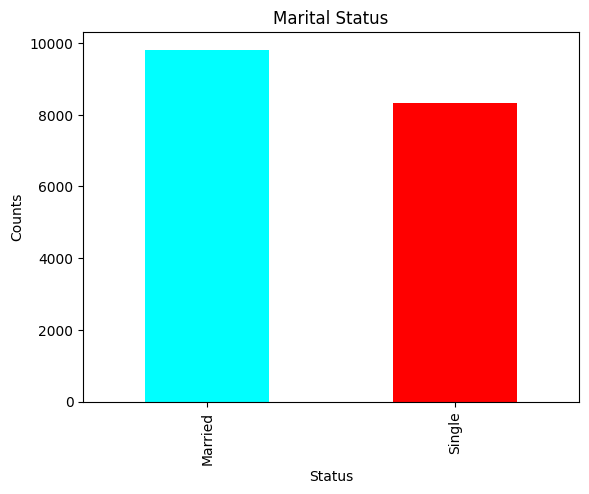

In [9]:
data.MaritalStatus.value_counts().plot(kind = 'bar', color = ["Cyan","Red"])
plt.title("Marital Status")
plt.xlabel("Status")
plt.ylabel("Counts")

#Visualize customers gender with pie chart

Text(0.5, 1.0, 'Gender')

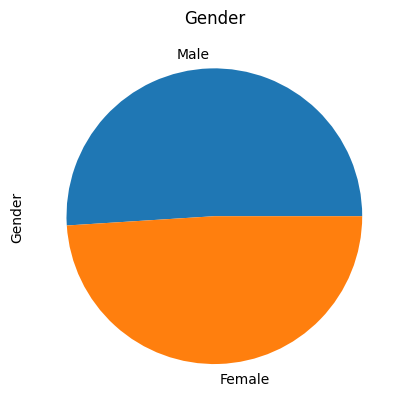

In [10]:
data.Gender.value_counts().plot(kind = 'pie')
plt.title("Gender")

#Generate a histogram of AnnualIncome after first converting to numerical format

In [11]:
data.AnnualIncome

0        $90,000 
1        $60,000 
2        $60,000 
3        $70,000 
4        $80,000 
           ...   
18143    $30,000 
18144    $30,000 
18145    $30,000 
18146    $30,000 
18147    $30,000 
Name: AnnualIncome, Length: 18148, dtype: object

In [12]:
data.AnnualIncome = data.AnnualIncome.str.strip("$")
data.AnnualIncome

0        90,000 
1        60,000 
2        60,000 
3        70,000 
4        80,000 
          ...   
18143    30,000 
18144    30,000 
18145    30,000 
18146    30,000 
18147    30,000 
Name: AnnualIncome, Length: 18148, dtype: object

In [13]:
data.AnnualIncome.str.replace(",","")

0        90000 
1        60000 
2        60000 
3        70000 
4        80000 
          ...  
18143    30000 
18144    30000 
18145    30000 
18146    30000 
18147    30000 
Name: AnnualIncome, Length: 18148, dtype: object

In [14]:
data.AnnualIncome = data.AnnualIncome.str.replace(",","")
data.AnnualIncome

0        90000 
1        60000 
2        60000 
3        70000 
4        80000 
          ...  
18143    30000 
18144    30000 
18145    30000 
18146    30000 
18147    30000 
Name: AnnualIncome, Length: 18148, dtype: object

In [15]:
data.AnnualIncome.astype(int)

0        90000
1        60000
2        60000
3        70000
4        80000
         ...  
18143    30000
18144    30000
18145    30000
18146    30000
18147    30000
Name: AnnualIncome, Length: 18148, dtype: int64

In [16]:
data.AnnualIncome = data.AnnualIncome.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18148 non-null  int64 
 1   FirstName       18148 non-null  object
 2   LastName        18148 non-null  object
 3   Full Name       18148 non-null  object
 4   BirthDate       18148 non-null  object
 5   MaritalStatus   18148 non-null  object
 6   Gender          18148 non-null  object
 7   EmailAddress    18148 non-null  object
 8   AnnualIncome    18148 non-null  int64 
 9   TotalChildren   18148 non-null  int64 
 10  EducationLevel  18148 non-null  object
 11  Occupation      18148 non-null  object
 12  HomeOwner       18148 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.8+ MB


In [17]:
data.AnnualIncome.value_counts()

60000     3072
40000     2688
70000     2313
30000     2236
20000     1745
80000     1325
10000     1135
90000      830
50000      661
100000     559
130000     501
110000     459
120000     324
170000     109
150000     100
160000      91
Name: AnnualIncome, dtype: int64

Text(0, 0.5, 'Frequency')

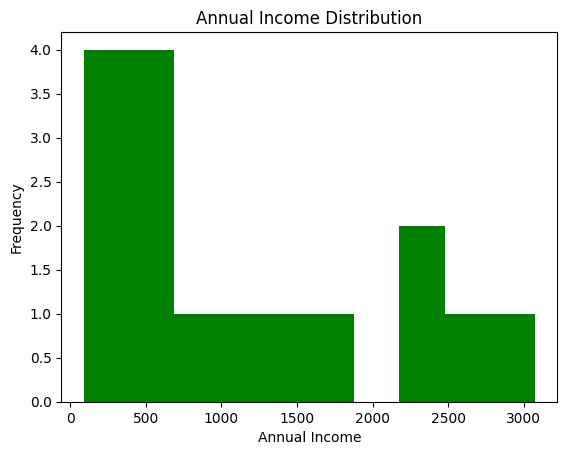

In [18]:
data.AnnualIncome.value_counts().plot(kind = 'hist', color = ["green"])
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")

#Create a columnfor average number of TotalChildren for each EducationLevel

In [19]:
data.describe()

,CustomerKey,AnnualIncome,TotalChildren
count,18148.000000,18148.000000,18148.000000
mean,20247.470465,57269.120564,1.843619
std,5336.245656,32236.535573,1.613203
min,11000.000000,10000.000000,0.000000
25%,15626.750000,30000.000000,0.000000
50%,20252.500000,60000.000000,2.000000
75%,24868.250000,70000.000000,3.000000
max,29483.000000,170000.000000,5.000000


In [20]:
data.TotalChildren.mean()

1.8436191315847477

In [21]:
data['Children Average'] = data.TotalChildren.mean()
data.sample()

,CustomerKey,FirstName,LastName,Full Name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Children Average
14348,25616,JÉSUS,RUBIO,MR. JÉSUS RUBIO,27/02/1968,Married,Male,jésus20@learnsector.com,30000,1,Bachelors,Clerical,Yes,1.843619


In [22]:
data.groupby(['Children Average', "EducationLevel"]).size()

Children Average  EducationLevel     
1.843619          Bachelors              5261
                  Graduate Degree        3125
                  High School            3241
                  Partial College        4966
                  Partial High School    1555
dtype: int64

In [23]:
data.groupby(['Children Average', "EducationLevel"]).size().reset_index()

,Children Average,EducationLevel,0
0,1.843619,Bachelors,5261
1,1.843619,Graduate Degree,3125
2,1.843619,High School,3241
3,1.843619,Partial College,4966
4,1.843619,Partial High School,1555


Text(0.5, 1.0, 'Education Level/Children Average Distribution')

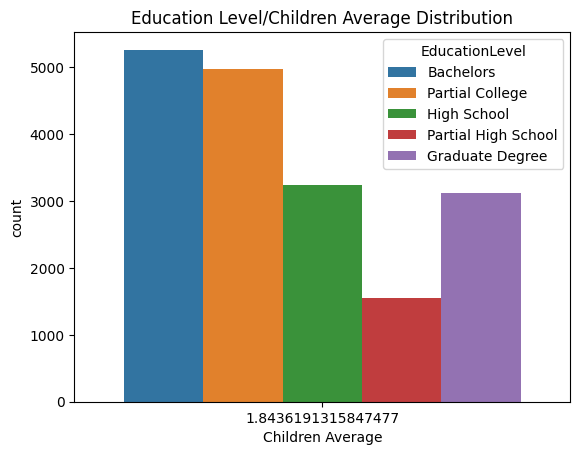

In [24]:
sns.countplot(x = "Children Average", hue = "EducationLevel" , data = data)
plt.title("Education Level/Children Average Distribution")

In [25]:
data['AnnualIncome Average'] = data.AnnualIncome.mean()
data.sample()

,CustomerKey,FirstName,LastName,Full Name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Children Average,AnnualIncome Average
2344,13389,MADISON,THOMAS,MRS. MADISON THOMAS,20/11/1950,Married,Female,madison11@learnsector.com,70000,4,Partial College,Professional,No,1.843619,57269.120564


In [26]:
data.groupby(['AnnualIncome Average', "Occupation"]).size()

AnnualIncome Average  Occupation    
57269.120564          Clerical          2859
                      Management        3011
                      Manual            2353
                      Professional      5424
                      Skilled Manual    4501
dtype: int64

In [27]:
data.groupby(['AnnualIncome Average', "Occupation"]).size().reset_index()

,AnnualIncome Average,Occupation,0
0,57269.120564,Clerical,2859
1,57269.120564,Management,3011
2,57269.120564,Manual,2353
3,57269.120564,Professional,5424
4,57269.120564,Skilled Manual,4501


#Use a bar chart to compare the average AnnualIncome across different Occupation categories.

<Axes: xlabel='AnnualIncome Average', ylabel='count'>

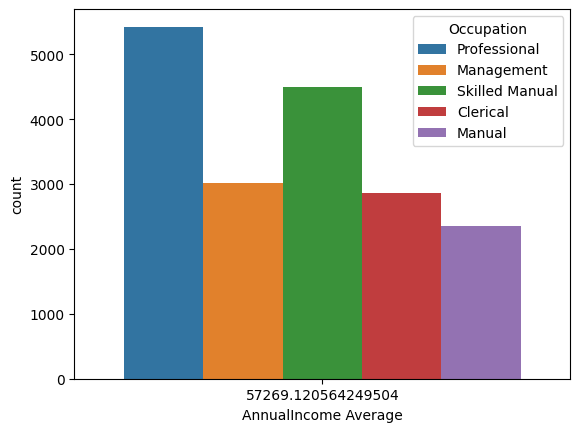

In [28]:
sns.countplot(x = "AnnualIncome Average" , hue = "Occupation", data = data)

#Visualize the count of customers in each Occupation category using a pie chart.

<Axes: ylabel='Occupation'>

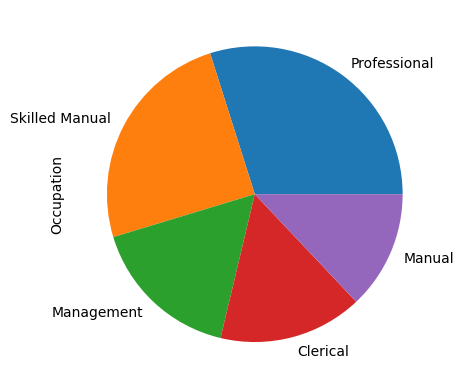

In [29]:
data.Occupation.value_counts().plot(kind='pie', ylabel='Occupation')

#Generate a histogram to explore the age distribution of customers

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerKey           18148 non-null  int64  
 1   FirstName             18148 non-null  object 
 2   LastName              18148 non-null  object 
 3   Full Name             18148 non-null  object 
 4   BirthDate             18148 non-null  object 
 5   MaritalStatus         18148 non-null  object 
 6   Gender                18148 non-null  object 
 7   EmailAddress          18148 non-null  object 
 8   AnnualIncome          18148 non-null  int64  
 9   TotalChildren         18148 non-null  int64  
 10  EducationLevel        18148 non-null  object 
 11  Occupation            18148 non-null  object 
 12  HomeOwner             18148 non-null  object 
 13  Children Average      18148 non-null  float64
 14  AnnualIncome Average  18148 non-null  float64
dtypes: float64(2), int6

In [31]:
pd.to_datetime(data.BirthDate)

<ipython-input-31-2f085b2da71e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(data.BirthDate)


0       1966-04-08
1       1965-05-14
2       1965-08-12
3       1968-02-15
4       1968-08-08
           ...    
18143   1958-07-04
18144   1960-11-10
18145   1960-01-05
18146   1959-03-05
18147   1959-12-08
Name: BirthDate, Length: 18148, dtype: datetime64[ns]

In [32]:
pd.to_datetime(data.BirthDate, format = '%d/%m/%Y')

0       1966-08-04
1       1965-05-14
2       1965-12-08
3       1968-02-15
4       1968-08-08
           ...    
18143   1958-04-07
18144   1960-10-11
18145   1960-05-01
18146   1959-05-03
18147   1959-08-12
Name: BirthDate, Length: 18148, dtype: datetime64[ns]

In [33]:
data.BirthDate = pd.to_datetime(data.BirthDate, format = '%d/%m/%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18148 non-null  int64         
 1   FirstName             18148 non-null  object        
 2   LastName              18148 non-null  object        
 3   Full Name             18148 non-null  object        
 4   BirthDate             18148 non-null  datetime64[ns]
 5   MaritalStatus         18148 non-null  object        
 6   Gender                18148 non-null  object        
 7   EmailAddress          18148 non-null  object        
 8   AnnualIncome          18148 non-null  int64         
 9   TotalChildren         18148 non-null  int64         
 10  EducationLevel        18148 non-null  object        
 11  Occupation            18148 non-null  object        
 12  HomeOwner             18148 non-null  object        
 13  Children Average

In [34]:
def age():
  current_year = 2024
  date = ("BirthDate")
  age = current_year - date
  return age

#Create a bar chart that shows the number of homeowners vs. non-homeowners

Text(0.5, 0, 'Status')

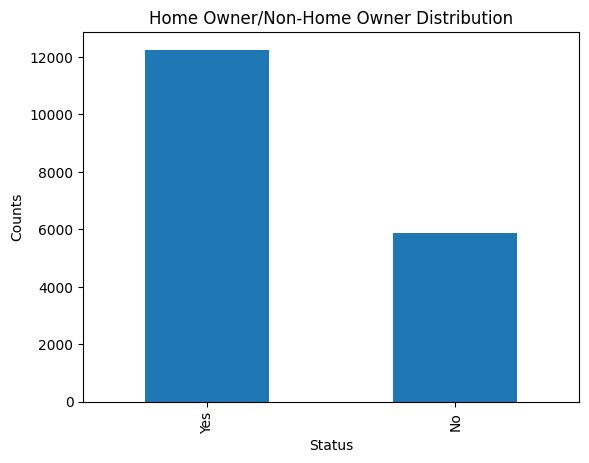

In [35]:
data.HomeOwner.value_counts().plot(kind='bar')
plt.title("Home Owner/Non-Home Owner Distribution")
plt.ylabel("Counts")
plt.xlabel("Status")

#Use a column chart to display the total number of customers by EducationLevel

In [36]:
data.EducationLevel.value_counts().reset_index()

,index,EducationLevel
0,Bachelors,5261
1,Partial College,4966
2,High School,3241
3,Graduate Degree,3125
4,Partial High School,1555


Text(0, 0.5, 'Counts')

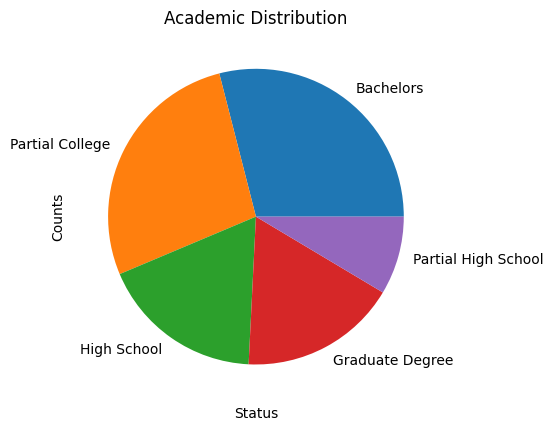

In [37]:
data.EducationLevel.value_counts().plot(kind = "pie")
plt.title("Academic Distribution")
plt.xlabel("Status")
plt.ylabel("Counts")

#Visualize the distribution of TotalChildren using a histogram

In [38]:
data.TotalChildren.value_counts().reset_index()

,index,TotalChildren
0,0,5080
1,2,3703
2,1,3552
3,4,2259
4,3,2153
5,5,1401


Text(0, 0.5, 'Frequency')

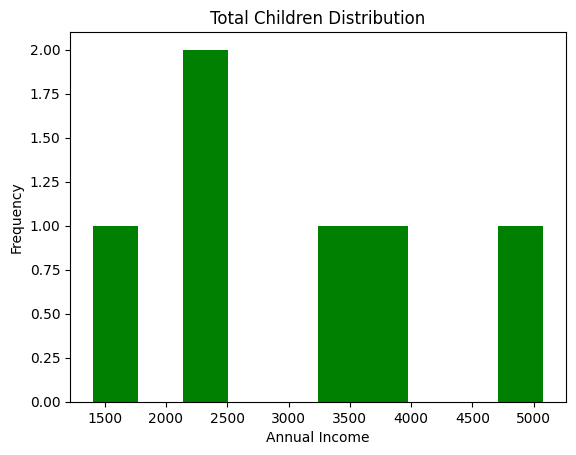

In [39]:
data.TotalChildren.value_counts().plot(kind = 'hist', color = ["green"])
plt.title("Total Children Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")

[]

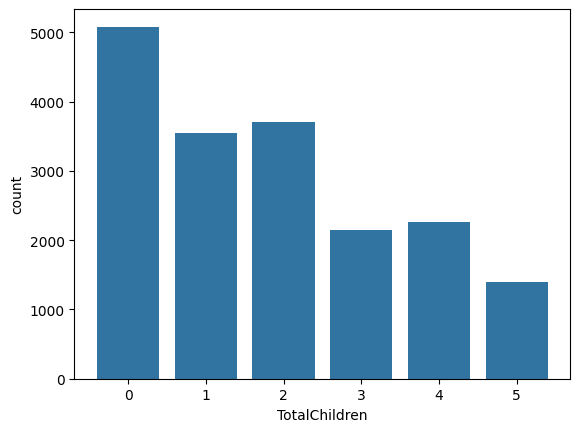

In [40]:
sns.countplot(x = "TotalChildren" , data = data).plot(kind = "hist")

#Create a pie chart showing the proportion of different MaritalStatus categories within a specific Occupation

In [41]:
data.groupby(['MaritalStatus', "Occupation"]).size().reset_index()

,MaritalStatus,Occupation,0
0,Married,Clerical,1407
1,Married,Management,1888
2,Married,Manual,791
3,Married,Professional,3062
4,Married,Skilled Manual,2669
5,Single,Clerical,1452
6,Single,Management,1123
7,Single,Manual,1562
8,Single,Professional,2362
9,Single,Skilled Manual,1832


<Axes: >

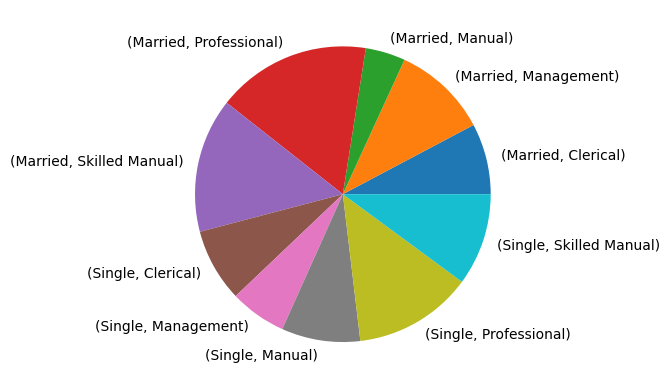

In [42]:
data.groupby(['MaritalStatus', "Occupation"]).size().plot(kind = "pie")

#Plot a bar chart comparing the count of male vs. female customers in each EducationLevel

In [43]:
data.groupby(['Gender', "EducationLevel"]).size().reset_index()

,Gender,EducationLevel,0
0,Female,Bachelors,2564
1,Female,Graduate Degree,1567
2,Female,High School,1555
3,Female,Partial College,2465
4,Female,Partial High School,741
5,Male,Bachelors,2697
6,Male,Graduate Degree,1558
7,Male,High School,1686
8,Male,Partial College,2501
9,Male,Partial High School,814


Text(0, 0.5, 'Counts')

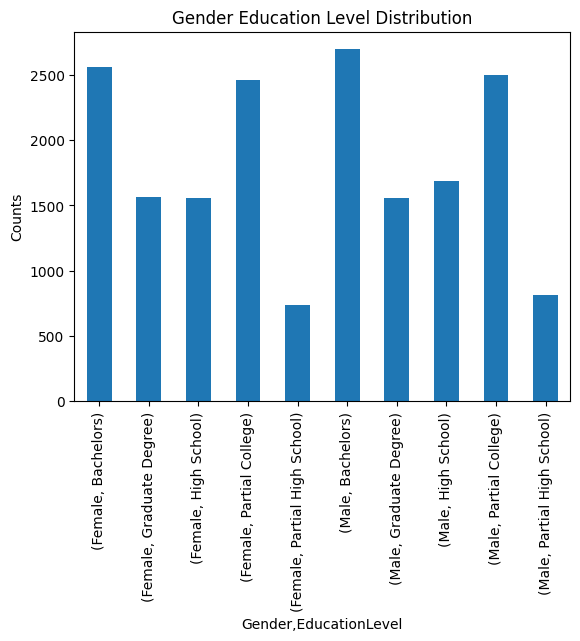

In [58]:
data.groupby(['Gender', "EducationLevel"]).size().plot(kind = "bar")
plt.title("Gender Education Level Distribution")
plt.ylabel("Counts")

#Use a line chart to depict the average number of TotalChildren across different income ranges

In [46]:
data.groupby(['Children Average', "AnnualIncome"]).size().reset_index()

,Children Average,AnnualIncome,0
0,1.843619,10000,1135
1,1.843619,20000,1745
2,1.843619,30000,2236
3,1.843619,40000,2688
4,1.843619,50000,661
5,1.843619,60000,3072
6,1.843619,70000,2313
7,1.843619,80000,1325
8,1.843619,90000,830
9,1.843619,100000,559


<Axes: xlabel='Children Average,AnnualIncome'>

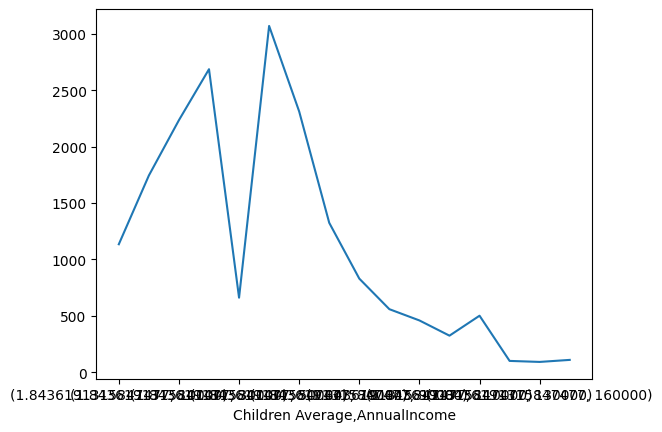

In [47]:
data.groupby(['Children Average', "AnnualIncome"]).size().plot(kind = "line")

#Generate a column chart that illustrates the count of customers by HomeOwner status for each MaritalStatus

In [48]:
data.groupby(['HomeOwner', "MaritalStatus"]).size().reset_index()

,HomeOwner,MaritalStatus,0
0,No,Married,1816
1,No,Single,4072
2,Yes,Married,8001
3,Yes,Single,4259


<Axes: xlabel='HomeOwner,MaritalStatus'>

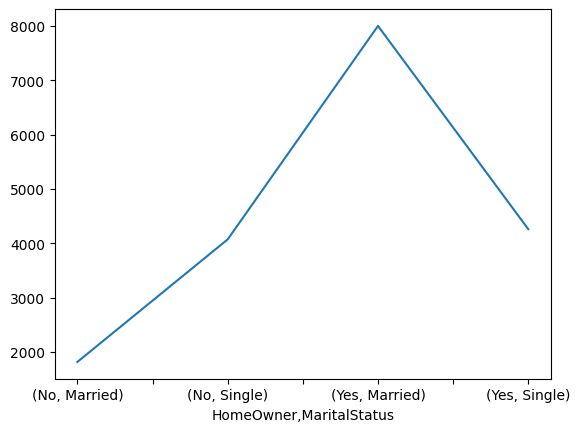

In [49]:
data.groupby(['HomeOwner', "MaritalStatus"]).size().plot(kind = "line")

#Visualize the distribution of customers' birth months using a bar chart (Extract month from BirthDate)

In [50]:
data.BirthDate.dt.month.reset_index()

,index,BirthDate
0,0,8
1,1,5
2,2,12
3,3,2
4,4,8
...,...,...
18143,18143,4
18144,18144,10
18145,18145,5
18146,18146,5


In [51]:
data['BirthMonth'] = data.BirthDate.dt.month
data.sample()

,CustomerKey,FirstName,LastName,Full Name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Children Average,AnnualIncome Average,BirthMonth
10857,22070,EDUARDO,BROWN,MR. EDUARDO BROWN,1963-02-07,Married,Male,eduardo3@learnsector.com,110000,4,Bachelors,Management,Yes,1.843619,57269.120564,2


In [52]:
data.BirthMonth.value_counts().reset_index()

,index,BirthMonth
0,11,1709
1,10,1672
2,3,1649
3,8,1635
4,6,1618
5,4,1617
6,5,1607
7,2,1578
8,9,1565
9,7,1502


Text(0, 0.5, 'Counts')

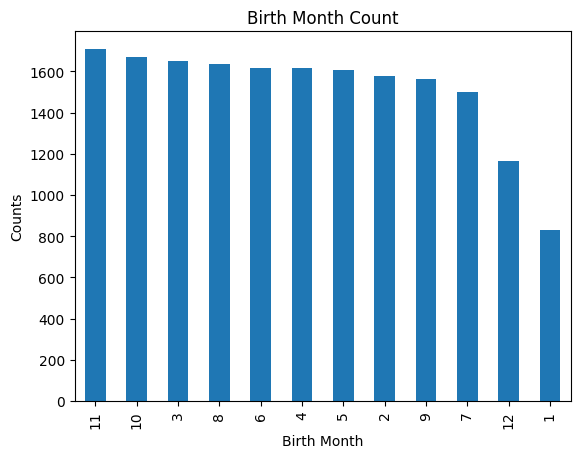

In [62]:
data.BirthMonth.value_counts().plot(kind = "bar")
plt.title("Birth Month Count")
plt.xlabel("Birth Month")
plt.ylabel("Counts")

#Create a pie chart to represent the proportion of customers by Occupation within a specific income range.

In [54]:
data.groupby(['Occupation', 'AnnualIncome']).size().reset_index()

,Occupation,AnnualIncome,0
0,Clerical,10000,84
1,Clerical,20000,510
2,Clerical,30000,1388
3,Clerical,40000,877
4,Management,40000,126
5,Management,50000,128
6,Management,60000,420
7,Management,70000,420
8,Management,80000,359
9,Management,90000,187


<Axes: >

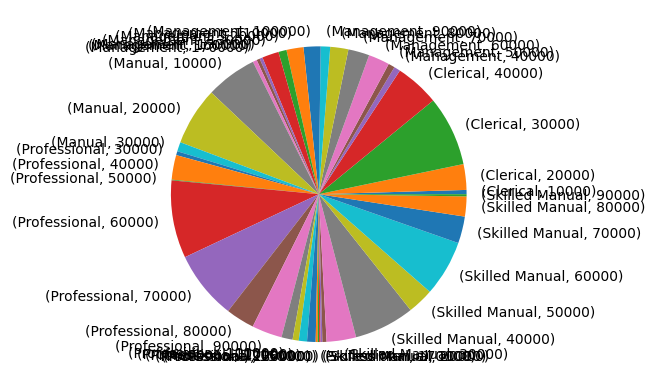

In [63]:
data.groupby(['Occupation', 'AnnualIncome']).size().plot(kind = 'pie')

#Use a bar chart to show the frequency of each EducationLevel category

In [56]:
data.EducationLevel.value_counts().reset_index()

,index,EducationLevel
0,Bachelors,5261
1,Partial College,4966
2,High School,3241
3,Graduate Degree,3125
4,Partial High School,1555


Text(0, 0.5, 'Counts')

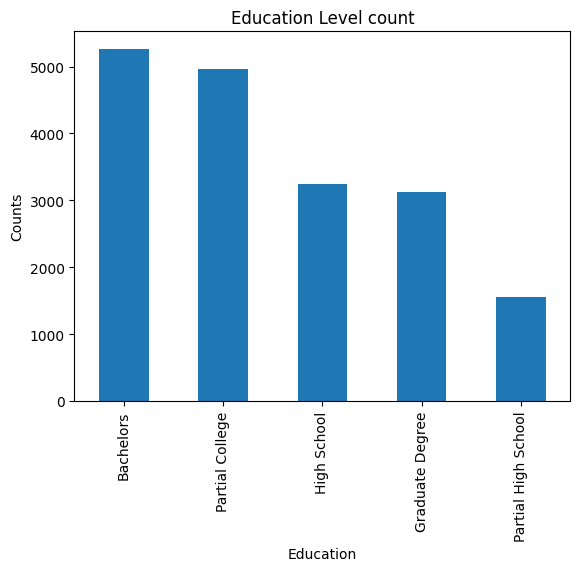

In [64]:
data.EducationLevel.value_counts().plot(kind = 'bar')
plt.title("Education Level count")
plt.xlabel("Education")
plt.ylabel("Counts")